In [1]:
path = "home/op/network_manila" 


## import road data



In [2]:
import geopandas as gpd
import pandas as pd
import os, sys
import GOSTnets as gn
import importlib
from osgeo import ogr

download files 
 -> run commands in this cell from shell, not from notebook

cd /home/op/network_manila

#rm -rf data_osm_raw/

mkdir data_osm_raw

cd data_osm_raw

curl -O "http://download.geofabrik.de/asia/philippines-latest.osm.pbf"

cd ..

In [3]:
file = r'data_osm_raw/philippines-latest.osm.pbf' 
#path_osm_raw = os.path.join(path,  file)
#path_osm_raw

In [4]:
philippines = gn.OSM_to_network(file)

In [5]:
accepted_road_types = ['residential', 'unclassified', 'track','service','tertiary',
                       'road','secondary','primary','trunk','primary_link','trunk_link',
                       'tertiary_link','secondary_link']
philippines.filterRoads(acceptedRoads = accepted_road_types)
philippines.roads_raw.infra_type.value_counts()

residential       350682
service            91774
track              67404
unclassified       65476
tertiary           32663
secondary          13551
primary            13533
trunk              12132
road                3787
trunk_link          1369
primary_link         795
tertiary_link        687
secondary_link       557
Name: infra_type, dtype: int64

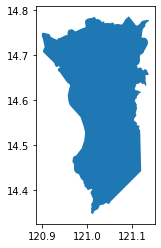

In [27]:
#get administrative boundary
philippines_adm2 = gpd.read_file("boundaries/philippines_adm2.geojson")
philippines_adm2 = philippines_adm2.to_crs({'init':'epsg:4326'})
manila = philippines_adm2[philippines_adm2.ADM2_NAME=="Metropolitan Manila"]
manila_geom = manila.geometry.unary_union
manila.plot()

In [30]:
#keep only roads intersecting with area
philippines.roads_raw = philippines.roads_raw.loc[
    philippines.roads_raw.geometry.intersects(manila_geom) == True]

In [31]:
#generate gdf
philippines.generateRoadsGDF(verbose = False)

In [32]:
#generate graph
philippines.initialReadIn()

In [33]:
gn.save(philippines.network,'manila_unclean','data_osm_raw')

In [40]:
import networkx as nx

In [41]:
G = nx.read_gpickle('data_osm_raw/manila_unclean.pickle')

In [42]:
G

In [9]:
G0 = osmnx.graph_from_place('metro manila, philippines', network_type='drive')